## Table of Contents:
* [Introduction](#intro)
* [Basic Analysis](#analysis)
* [Statistical Analysis](#stat_analysis)
* [Advanced Statistical Analysis](#adv_stat_analysis)
* [Conclusion](#conc)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [4]:
df = pd.read_csv('../data/mosquito_data_part_2.csv')

### Part 1 - Basic Analysis     
1. Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.      
2. What is the average number of mosquitoes for each month? What trends do you notice?

In [5]:
# reminding myself of the data
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


In [6]:
# checking the value counts of WNV Present so I can make sure changing to binary preserves the correct values
df['WNV Present'].value_counts()

WNV Present
negative    14501
positive     3994
Name: count, dtype: int64

In [7]:
# converting the WNV Present column to binary and dropping the negative column since it's redundant
df['WNV Present'] = pd.get_dummies(df['WNV Present']).drop(columns='negative')

In [8]:
# checking that the column was converted
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,False,CULEX RESTUANS,41.657069,-87.546049,9


In [9]:
# making sure the value counts were preserved, and they were
df['WNV Present'].value_counts()

WNV Present
False    14501
True      3994
Name: count, dtype: int64

In [10]:
# checking the value counts of Trap type so I can make sure changing to dummies preserves the correct values
df['Trap type'].value_counts()

Trap type
GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: count, dtype: int64

In [11]:
# creating dummy variables from the trap type column and appending them to the dataframe
df = pd.concat([df, pd.get_dummies(df['Trap type'])], axis=1)

In [12]:
# dropping the Trap type column since it's now redundant
df.drop(columns='Trap type', inplace=True)

In [13]:
# checking to make sure the value counts of trap type were preserved, and they were
df[['CDC', 'GRAVID', 'OVI', 'SENTINEL']].sum()

CDC           544
GRAVID      17741
OVI             1
SENTINEL      209
dtype: int64

In [14]:
# checking that the dummy columns were added and the Trap type column removed
df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.977738,-87.880969,9,False,True,False,False
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.798211,-87.736925,9,False,True,False,False
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.987245,-87.689417,9,False,True,False,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.953664,-87.724987,9,False,True,False,False
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,False,CULEX RESTUANS,41.657069,-87.546049,9,False,True,False,False


In [15]:
# not part of assignment initially, trying to resolve the question to get the right answer (the one below is incorrect)
df.groupby('Month')['Mosquito number'].sum()

Month
5       116
6     28607
7     59007
8     83229
9     29055
10     1210
Name: Mosquito number, dtype: int64

In [16]:
df.groupby('Month')['Year'].nunique()

Month
5      2
6     13
7     13
8     13
9     13
10     4
Name: Year, dtype: int64

In [17]:
df.groupby('Month')['Mosquito number'].sum() / df.groupby('Month')['Year'].nunique()

Month
5       58.000000
6     2200.538462
7     4539.000000
8     6402.230769
9     2235.000000
10     302.500000
dtype: float64

In [18]:
# getting the average mosquito number per month
df.groupby(['Month']).mean(numeric_only=True)['Mosquito number']

Month
5      2.761905
6     10.264442
7     11.551879
8     12.111321
9      8.394973
10     5.377778
Name: Mosquito number, dtype: float64

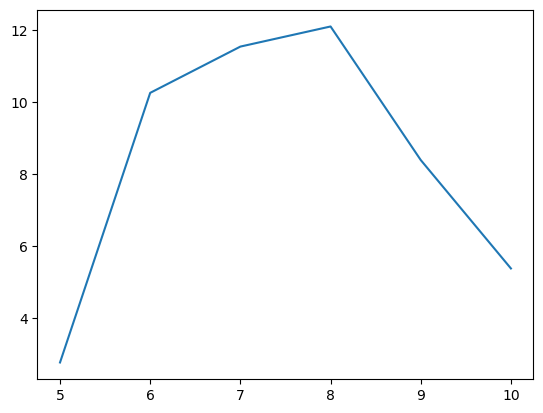

In [19]:
# plotting the data
plt.figure()
plt.plot(df.groupby(['Month']).mean(numeric_only=True)['Mosquito number'])
plt.show()

The number of mosquitos peaks in August and overall spikes in the summer months.

### Part 2 - Statistical Analysis      
1. Is there a statistically significant difference between the different mosquito species when looking at the occurrence of West Nile Virus?
2. Which columns are positively correlated with the number of mosquitoes caught? Which columns are negatively correlated? Are these correlations statistically significant?

To determine if there's a statistically significant difference/relationship between different mosquito species and occurrence of West Nile Virus we need to perform a Chi-squared test for independence.   

The hypotheses are:   
$H_0$: There is no relationship between mosquito species and occurrence of WNV   
$H_1$: There is some relationship between mosquito species and occurrence of WNV

In [20]:
# first I'm going to create dummy variables out of the species column
df = pd.concat([df, pd.get_dummies(df['Species'])], axis=1)
df.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.977738,-87.880969,9,False,True,False,False,False,True,False,False
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.798211,-87.736925,9,False,True,False,False,False,True,False,False
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,False,CULEX RESTUANS,41.987245,-87.689417,9,False,True,False,False,False,True,False,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,False,CULEX RESTUANS,41.953664,-87.724987,9,False,True,False,False,False,True,False,False
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,False,CULEX RESTUANS,41.657069,-87.546049,9,False,True,False,False,False,True,False,False


In [21]:
# then create the contingency table of species vs. WNV presence
species = df.groupby(['WNV Present']).sum(numeric_only=True)[['CULEX PIPIENS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TERRITANS']]
species

,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
WNV Present,,,,
False,4074,9309,215,903
True,1412,2557,11,14


In [22]:
# running the test
stats.chi2_contingency(species)

Chi2ContingencyResult(statistic=311.10394683130164, pvalue=3.9302341764409087e-67, dof=3, expected_freq=array([[4301.29689105, 9303.5342525 ,  177.19524196,  718.97361449],
       [1184.70310895, 2562.4657475 ,   48.80475804,  198.02638551]]))

##### Since the p-value is extremely low we can reject the null hypothesis and conclude that there is some relationship/difference between mosquito species and occurence of West Nile Virus.

In [23]:
# finding the correlations between the different columns
df.corr(numeric_only=True)

,Year,Week,Mosquito number,WNV Present,Lat,Lon,Month,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
Year,1.000000,-0.023283,0.129326,0.153881,0.093983,-0.094628,-0.100847,-0.261514,0.155283,-0.011656,0.128327,-0.347588,0.343895,-0.066536,0.005373
Week,-0.023283,1.000000,-0.033900,0.174265,-0.002876,0.002967,0.948940,0.028723,-0.047021,-0.013587,0.043002,0.316788,-0.315605,-0.011918,0.036645
Mosquito number,0.129326,-0.033900,1.000000,0.408034,0.096820,-0.151421,-0.040426,0.094147,-0.138275,-0.005392,0.108575,0.014730,0.070999,-0.072859,-0.150962
WNV Present,0.153881,0.174265,0.408034,1.000000,0.110175,-0.163967,0.161334,0.002740,-0.027359,-0.003859,0.047073,0.065388,-0.001498,-0.045215,-0.111394
Lat,0.093983,-0.002876,0.096820,0.110175,1.000000,-0.749416,-0.011544,-0.068795,0.067916,0.001292,-0.017184,-0.052372,0.076660,-0.004388,-0.056925
Lon,-0.094628,0.002967,-0.151421,-0.163967,-0.749416,1.000000,0.010695,0.060961,-0.081628,-0.004017,0.055548,0.021916,-0.055278,-0.004243,0.078145
Month,-0.100847,0.948940,-0.040426,0.161334,-0.011544,0.010695,1.000000,0.070174,-0.078398,-0.011988,0.035333,0.330760,-0.327509,-0.010218,0.032683
CDC,-0.261514,0.028723,0.094147,0.002740,-0.068795,0.060961,0.070174,1.000000,-0.844420,-0.001280,-0.018611,0.158779,-0.150160,0.038892,-0.022071
GRAVID,0.155283,-0.047021,-0.138275,-0.027359,0.067916,-0.081628,-0.078398,-0.844420,1.000000,-0.035669,-0.518582,-0.109750,0.098497,-0.029333,0.028193
OVI,-0.011656,-0.013587,-0.005392,-0.003859,0.001292,-0.004017,-0.011988,-0.001280,-0.035669,1.000000,-0.000786,0.011323,-0.009838,-0.000818,-0.001680


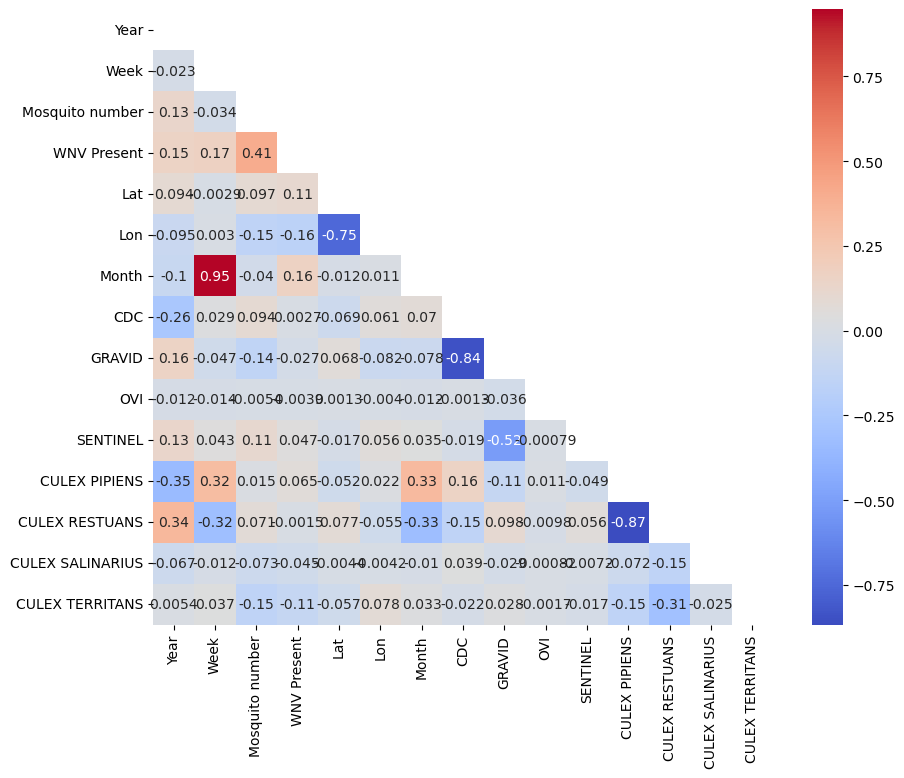

In [25]:
# visualizing the correlations with a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), mask=np.triu(df.corr(numeric_only=True)), cmap='coolwarm', annot=True)
plt.show()

<Axes: >

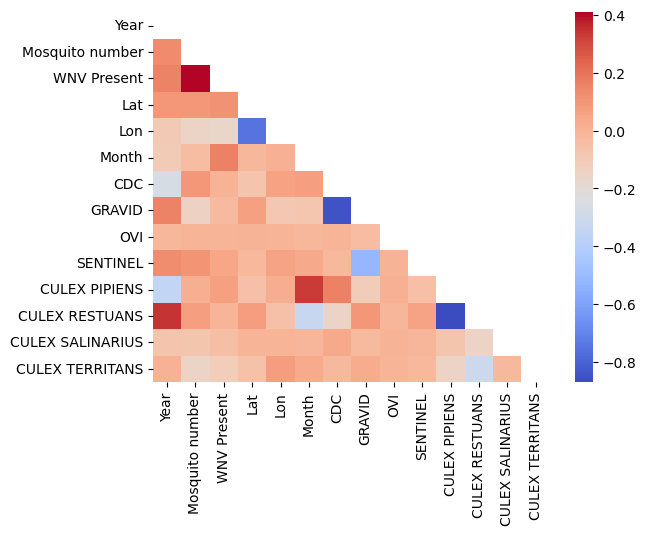

In [92]:
# it looks like the high correlation between week and month is skewing the visualization, so I'll take out one of the variables for now
sns.heatmap(df.drop(columns='Week').corr(numeric_only=True), mask=np.triu(df.drop(columns='Week').corr(numeric_only=True)), cmap='coolwarm')

We can see more clearly that there is some positive correlation between mosquito number and WNV Present (which makes sense, the more mosquitos you trap the more likely there will be WNV). Otherwise there doesn't seem to be any column that is very positively or negatively correlated with mosquito number.

In [103]:
# checking for statistical significance
stats.pearsonr(df['Mosquito number'], df['WNV Present'])

PearsonRResult(statistic=0.40803439689029114, pvalue=0.0)

The sample correlation is .408 which is the same as shown above, and since the p-value is 0 we can reject the null hypothesis and say that there is a statistically significant correlation between the two columns.

### Part 3 - Advanced Statistical Analysis     
1. Run a linear regression to determine how the independent variables affect the number of mosquitoes caught. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

Note:
- You will likely see a low R^2 value, that is to be expected.
- This dataset does not respond well to performing VIF analysis, so this is not required.
- WNV Present must not be one of your independent variables.

2. Run a logistic regression to determine how the independent variables affect West Nile Virus presence. Explain your model construction process. Analyze the model and the results and discuss the model’s limitations. This may end up being an iterative process.

Note:
- Mosquito number should be one of your independent variables.

In [127]:
# setting independent variables X (and dropping unnecessary/non-numeric data) and dependent variable y
X = df.drop(columns=['WNV Present', 'Species', 'Address Block', 'Trap', 'Date'])
y = df['WNV Present']

In [128]:
# adding in the constant in order to run the model
X_withconstant = sm.add_constant(X)

In [129]:
# instantiating the model
linreg = sm.OLS(y, X_withconstant)

# fitting the model
linreg_results = linreg.fit()

# looking at the summary
linreg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WNV Present   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     452.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:48:29   Log-Likelihood:                -7438.0
No. Observations:               18495   AIC:                         1.490e+04
Df Residuals:                   18482   BIC:                         1.500e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -42.5556      2.135    -19.934      0.000     -46.740     -38.371
Year                 0.0130      0.001     15.788      0.000       0.011       0.015
Week                 0.0097      0.002      4.790      0.000       0.006       0.014
Mosquito number      0.0116      0.000     55.869      0.000       0.011       0.012
Lat                 -0.0606      0.035     -1.735      0.083      -0.129       0.008
Lon                 -0.4527      0.043    -10.611      0.000      -0.536      -0.369
Month                0.0346      0.009      3.949      0.000       0.017       0.052
CDC                -10.6660      0.537    -19.854      0.000     -11.719      -9.613
GRAVID             -10.6356      0.539    -19.715      0.000     -11.693      -9.578
OVI                -10.5781      0.607    -17.435      0.000     -11.767      -9.389
SENTINEL           -10.6760      0.539    -19.802      0.000     -11.733      -9.619
CULEX PIPIENS      -10.5853      0.533    -19.849      0.000     -11.631      -9.540
CULEX RESTUANS     -10.6176      0.534    -19.871      0.000     -11.665      -9.570
CULEX SALINARIUS   -10.6417      0.534    -19.923      0.000     -11.689      -9.595
CULEX TERRITANS    -10.7110      0.534    -20.071      0.000     -11.757      -9.665
==============================================================================
Omnibus:                     1987.587   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2697.105
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       3.210   Cond. No.                     1.65e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [131]:
# let's see what the results look like if we take out latitude and longitude
X2 = df.drop(columns=['WNV Present', 'Species', 'Address Block', 'Trap', 'Date', 'Lat','Lon'])

X2_withconstant = sm.add_constant(X2)

# instantiating the model
linreg2 = sm.OLS(y, X2_withconstant)

# fitting the model
linreg_results2 = linreg2.fit()

# looking at the summary
linreg_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            WNV Present   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     517.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:48:55   Log-Likelihood:                -7536.4
No. Observations:               18495   AIC:                         1.509e+04
Df Residuals:                   18484   BIC:                         1.518e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -18.7405      1.109    -16.902      0.000     -20.914     -16.567
Year                 0.0137      0.001     16.600      0.000       0.012       0.015
Week                 0.0097      0.002      4.764      0.000       0.006       0.014
Mosquito number      0.0120      0.000     58.305      0.000       0.012       0.012
Month                0.0351      0.009      3.983      0.000       0.018       0.052
CDC                 -4.7216      0.285    -16.583      0.000      -5.280      -4.164
GRAVID              -4.6783      0.288    -16.250      0.000      -5.243      -4.114
OVI                 -4.5903      0.398    -11.521      0.000      -5.371      -3.809
SENTINEL            -4.7503      0.291    -16.325      0.000      -5.321      -4.180
CULEX PIPIENS       -4.6308      0.276    -16.764      0.000      -5.172      -4.089
CULEX RESTUANS      -4.6631      0.278    -16.747      0.000      -5.209      -4.117
CULEX SALINARIUS    -4.6798      0.277    -16.892      0.000      -5.223      -4.137
CULEX TERRITANS     -4.7668      0.278    -17.139      0.000      -5.312      -4.222
==============================================================================
Omnibus:                     2075.961   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2852.472
Skew:                           0.955   Prob(JB):                         0.00
Kurtosis:                       3.231   Cond. No.                     8.85e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [132]:
# for the logistic regression model I'll use the same X, y, and X_withconstant as above
logreg = sm.Logit(y, X_withconstant)

# fitting the model
logreg_results = logreg.fit()

# looking at the summary
logreg_results.summary()

         Current function value: inf
         Iterations: 35


/Users/yael/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/yael/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/yael/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/yael/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/yael/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warni

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18481
Method:                           MLE   Df Model:                           13
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                     inf
Time:                        22:51:21   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -348.0184   1.15e+06     -0.000      1.000   -2.26e+06    2.26e+06
Year                 0.1130      0.007     16.467      0.000       0.100       0.126
Week                 0.1002      0.016      6.243      0.000       0.069       0.132
Mosquito number      0.0651      0.001     44.694      0.000       0.062       0.068
Lat                 -0.6595      0.287     -2.301      0.021      -1.221      -0.098
Lon                 -3.5432      0.335    -10.580      0.000      -4.200      -2.887
Month                0.2202      0.069      3.192      0.001       0.085       0.355
CDC                -83.6858   1.09e+07  -7.67e-06      1.000   -2.14e+07    2.14e+07
GRAVID             -83.5301   1.09e+07  -7.65e-06      1.000   -2.14e+07    2.14e+07
OVI                -96.8786   1.09e+07  -8.88e-06      1.000   -2.14e+07    2.14e+07
SENTINEL           -83.9241   1.09e+07  -7.68e-06      1.000   -2.14e+07    2.14e+07
CULEX PIPIENS      -86.0708   9.08e+06  -9.48e-06      1.000   -1.78e+07    1.78e+07
CULEX RESTUANS     -86.3209   9.08e+06  -9.51e-06      1.000   -1.78e+07    1.78e+07
CULEX SALINARIUS   -87.0659   9.08e+06  -9.59e-06      1.000   -1.78e+07    1.78e+07
CULEX TERRITANS    -88.5608   9.08e+06  -9.76e-06      1.000   -1.78e+07    1.78e+07
====================================================================================
"""